In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

colors_list = plt.style.library["bmh"]['axes.prop_cycle']
colors_list = [c["color"] for c in colors_list]

%matplotlib inline

## Pitt Walker Dynamics

\begin{eqnarray}
X_0 &\sim& P_X(\cdot) \\
Z_t | X_t &\sim& P_{Z|X}(Z_t|X_t) \\
X_{t+1} |Z_t &\sim& P_{X|Z}(X_{t+1}|Z_t) \\
\end{eqnarray}

## Gamma Dynamics

\begin{equation}
P(x_3|z_2) \propto \beta^{z_2}x^{z_2 - 1}_3 e^{-\beta z_2}
\end{equation}

\begin{equation}
P(z_1|x_1) = \frac{(\phi x_1)^{z_1}}{z_1 !}e^{-\phi x_1}
\end{equation}



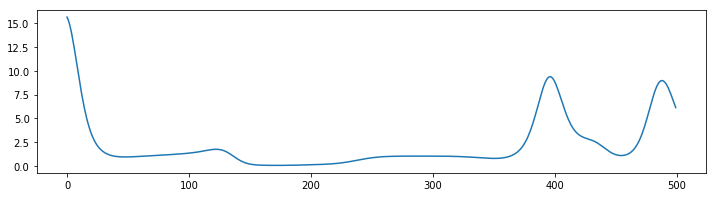

In [84]:
phi_t = np.exp(np.loadtxt("../../data/temporal_phi.txt"))
phi_damping = 1.
plt.figure(figsize=(12,3))
plt.plot(phi_t*phi_damping)

In [81]:
type(phi_t)

numpy.ndarray

In [186]:
def simple_gamma_pittwalker(T,X0,phi,beta,phi_damping=1.):
    """
    """
    if type(phi) == type(np.asarray([])):
        theta = beta
        time_support = range(T)
        X = np.zeros(T)
        Z = np.zeros(T)
        # N = np.zeros(T)

        X[0] = X0
        Z[0] = np.random.poisson(phi_damping*phi[0]*X[0])

        for i in time_support[:-1]:
            X[i+1] = np.random.gamma(Z[i],theta)
            Z[i+1] = np.random.poisson(phi_damping*phi[i]*X[i+1])

        return X,Z
    else:
        theta = beta
        time_support = range(T)
        X = np.zeros(T)
        Z = np.zeros(T)
        # N = np.zeros(T)

        X[0] = X0
        Z[0] = np.random.poisson(phi*X[0])

        for i in time_support[:-1]:
            X[i+1] = np.random.gamma(Z[i],theta)
            Z[i+1] = np.random.poisson(phi*X[i+1])

        return X,Z
        
def plot_pittwalker(X,Z,beta,phi):
    fig, ax1 = plt.subplots(figsize=(12,3))

    ax1.set_title("Beta {0} Phi {1}".format(beta,phi))
    ax1.plot(X,color=colors_list[0],label="X")
    ax1.set_ylabel("X")
    ax2 = ax1.twinx()
    ax2.plot(Z,color=colors_list[1],label="Z")
    ax2.set_ylabel("Z")
    ax1.grid(True)
    ax1.set_xlabel("time")
    ax1.legend(bbox_to_anchor=(0., -0.32, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    ax2.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.show()
    
def plot_hmm(U,Z,a,b,sigma):
    fig, ax1 = plt.subplots(figsize=(12,3))

    ax1.set_title("a {0} b {1} sigma {2}".format(a,b,sigma))
    ax1.plot(U,color=colors_list[0],label="U")
    ax1.set_ylabel("U")
    ax2 = ax1.twinx()
    ax2.plot(Z,color=colors_list[1],label="Z")
    ax2.set_ylabel("Z")
    ax1.grid(True)
    ax1.set_xlabel("time")
    ax1.legend(bbox_to_anchor=(0., -0.32, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    ax2.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

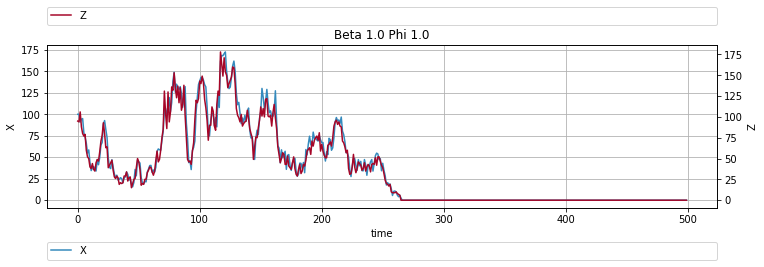

In [187]:
beta = 1.
phi = 1.
T = 500
X0 = 100.
phi_damping = 0.2
X,Z = simple_gamma_pittwalker(T,X0,phi, beta,phi_damping)
plot_pittwalker(X,Z,beta,phi)

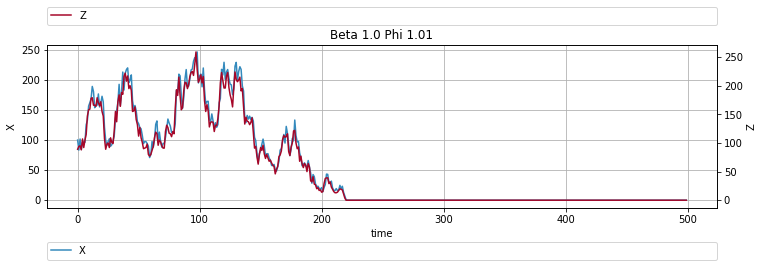

In [188]:
beta = 1.
phi = 1.01

X,Z = simple_gamma_pittwalker(T,X0,phi, beta)
plot_pittwalker(X,Z,beta,phi)

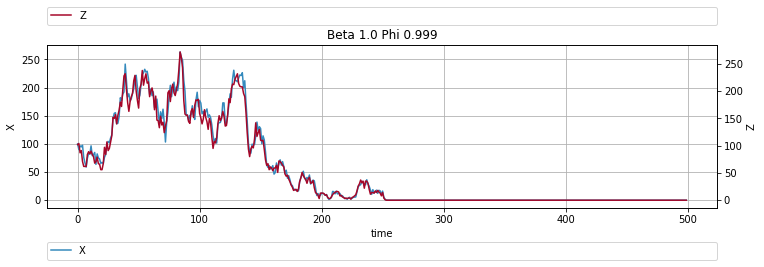

In [189]:
beta = 1.
phi = 0.999

X,Z = simple_gamma_pittwalker(T,X0,phi, beta)
plot_pittwalker(X,Z,beta,phi)

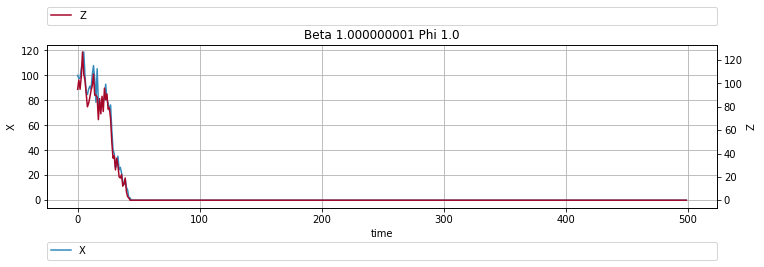

In [199]:
beta = 1.000000001
phi = 1.
X,Z = simple_gamma_pittwalker(T,X0,phi, beta)
plot_pittwalker(X,Z,beta,phi)

In [13]:
def simple_hmm_prior(T,U0,a,b,sigma):
    """
    """
    theta = 1./beta
    time_support = range(T)
    U = np.zeros(T)
    Z = np.zeros(T)
    # N = np.zeros(T)
    
    U[0] = X0
    
    for i in time_support[:-1]:
        U[i+1] = np.random.normal(a*U[i]+b,sigma)
    
    for i in time_support:
        Z[i] = np.random.poisson(phi*U[i])
        
    return Z,U

In [18]:
U0 = 100.
a = 1.001
b = 0.
sigma = 0.1
Z,U  = simple_hmm_prior(T,U0,a,b,sigma)

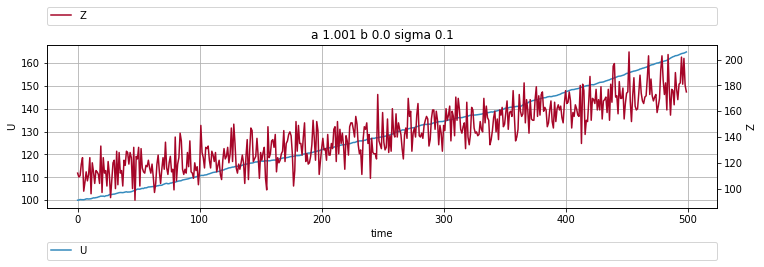

In [19]:
plot_hmm(U,Z,a,b,sigma)